In [ ]:
import numpy as	np;
import numpy.random as nr;
import scipy.linalg as LA;
import matplotlib.pyplot as plt;
import math

In [ ]:
# generate a Brownian motion path with 1/n discretization
def genBrownianMotion (n, tMax=1.0):
    tSeq = np.arange (tMax/float(n), 
                      tMax*(1+1/float(n)), tMax/float(n));
    sig = np.zeros ((n,n), dtype='float64');
    for i in range (n):
        sig[i,0:i] = tSeq[0:i];
        sig[i,i:] = tSeq[i];
    sigSqrt = LA.cholesky (sig, lower=True);
    z = np.dot (sigSqrt, nr.randn (n));
    z = np.insert (z, 0, 0);
    return z;

In [ ]:
# generate a Brownian motion path with 1/n discretization
def genBrownianMotion (n, tMax=1.0):
    tSeq = np.arange (tMax/float(n), 
                      tMax*(1+1/float(n)), tMax/float(n));
    sig = np.zeros ((n,n), dtype='float64');
    for i in range (n):
        sig[i,0:i] = tSeq[0:i];
        sig[i,i:] = tSeq[i];
    sigSqrt = LA.cholesky (sig, lower=True);
    z = np.dot (sigSqrt, nr.randn (n));
    z = np.insert (z, 0, 0);
    return z;

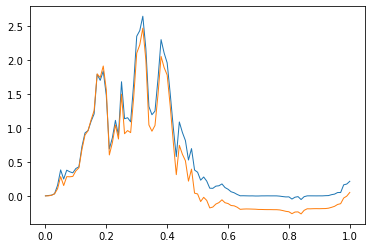

In [ ]:
np.random.seed(0)
num_of_path=1
seq=np.arange(0, 1+1/100, 1/100)
path=[]
process1=[0]*101
process2=[0]*101
for i in range(num_of_path):
    path.append(genBrownianMotion(100, 1))
    process1=path[i]**3
    
    tmp1=0
    tmp2=0
    for j in range(len(path[i])-1):
        tmp1+=3*(path[i][j]/100)
        tmp2+=3*(path[i][j]**2)*(path[i][j+1]-path[i][j])
        process2[j+1]=tmp1+tmp2
    plt.plot(seq, process1,linewidth=1)
    plt.plot(seq, process2,linewidth=1)
plt.show()

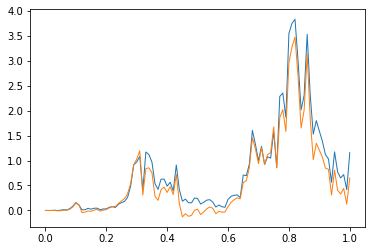

In [ ]:
np.random.seed(2)
num_of_path=1
seq=np.arange(0, 1+1/100, 1/100)
path=[]
process1=[0]*101
process2=[0]*101
process3=[0]*101
for i in range(num_of_path):
    path.append(genBrownianMotion(100, 1))
    process1=path[i]**4
    
    tmp1=0
    tmp2=0
    for j in range(len(path[i])-1):
        tmp1+=6*((path[i][j])**2/100)
        tmp2+=4*(path[i][j]**3)*(path[i][j+1]-path[i][j])
        process2[j+1]=tmp1+tmp2
        process3[j+1]=tmp1
    plt.plot(seq, process1,linewidth=1)
    plt.plot(seq, process2,linewidth=1)
plt.show()

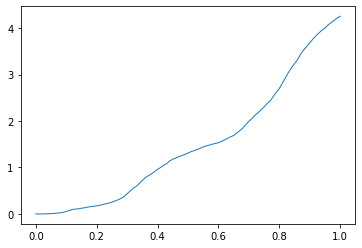

In [ ]:
plt.plot(seq, process3,linewidth=1)

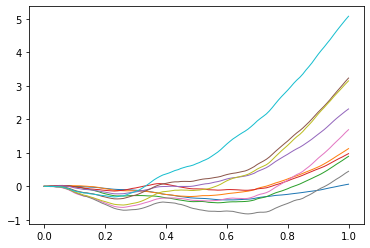

In [ ]:
np.random.seed(1)
num_of_path=10
seq=np.arange(0, 1+1/100, 1/100)
path=[]
process1=[0]*101
process2=[0]*101
for i in range(num_of_path):
    path.append(genBrownianMotion(100, 1))
    tmp1=0
    for j in range(len(path[i])-1):
        tmp1+=3*(path[i][j]/100)
        process1[j+1]+=tmp1
    plt.plot(seq, process1,linewidth=1)
plt.show()

In [ ]:
# Create a function that generates Brownian Path:
def brownian_path(end_time, time_step):
    ###PARA: end_time: the ending time of the time interval
    ###PARA: time_step: the time_step of the brownian motion (assume constant all the time)
    
    # Create a path list to store the brownian motion, B[0]=0
    total_len = int(end_time/time_step) +1
    BP = [0]*total_len
    
    # Each increment follows Gaussian r.v with mean: 0, variance: time_step
    for i in range(1,total_len):
        std=math.sqrt(time_step)
        BP[i] = np.random.normal(0,std,1)
    
    BP = np.array(BP).cumsum()
    
    # Create a time line:
    time_line = np.array([time_step*i for i in range(total_len)])
    
    return [time_line, BP] 

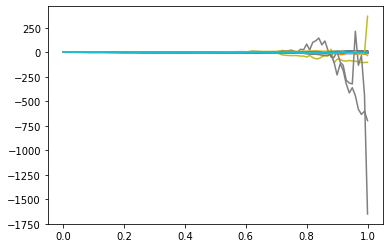

In [ ]:
N=100
endtime=1
for i in range(N):
    [time,BP]=brownian_path(endtime,0.01)
    B2=BP**2
    B2=B2.astype(float)
    expB2=np.exp(B2)
    tmp=0
    process=[0]*101
    for j in range(100):
        tmp=0
        tmp=expB2[j]*np.random.normal(0,0.1,1)
        process[j+1]=process[j]+tmp
    plt.plot(time, process)
    #plt.plot(time,BP)
    #plt.plot(time,expB2)
            